In [9]:
import pandas as pd
import numpy as np
import random
import math
from tqdm import tqdm

In [10]:
data = pd.read_csv('../data/bumps/seismic-bumps.csv')
feature_columns = [ col for col in data.columns if col not in ['id','target']]
feature_columns_cut=['f4','f5','f6','f7','f17']
for col in feature_columns_cut:
    data[col] = pd.qcut(data[col], q=5, labels=False, duplicates='drop')
print(data[feature_columns].nunique())

f1      2
f2      3
f3      2
f4      5
f5      5
f6      5
f7      5
f8      3
f9     10
f10     7
f11     7
f12     4
f13     2
f14     1
f15     1
f16     1
f17     3
f18    33
dtype: int64


In [11]:
print(feature_columns)

['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18']


In [12]:
def calculate_equivalence_classes(data, condition_attrs):
    # 取出条件属性的列索引
    # 设置条件属性为索引
    # print(condition_attrs)
    data_indexed = data.set_index(condition_attrs)
    # 按照索引分组并将分组内结果合并为列表
    equivalence_classes = data_indexed.groupby(level=condition_attrs)[data.columns[0]].apply(list).to_dict()
    return equivalence_classes

In [13]:
def fitness_function(feature_columns,data,decision_attr):
    # 计算D的信息熵
    total_records = len(data)
    decision_counts = data[decision_attr].value_counts()
    decision_prob = decision_counts / total_records
    entropy_D = -(decision_prob * np.log2(decision_prob)).sum()

    equivalence_classes = calculate_equivalence_classes(data,feature_columns)
    equivalence_classes_dec = calculate_equivalence_classes(data, decision_attr)

    entropy_DB = 0
    rule_confidences=0
    total_samples=0
    total_rule=0
    for equivalence_class in equivalence_classes.values():
        if len(equivalence_class)>total_records*0.01:
            total_samples=total_samples+len(equivalence_class)
            total_rule=total_rule+1
            a=[]
            for key_decision in equivalence_classes_dec.keys():
                x=set(equivalence_class).intersection(equivalence_classes_dec.get(key_decision))
                y = 1-len(x) / len(equivalence_class)
                a.append(y)
            max_rule = min(a)
            rule_confidences=rule_confidences+max_rule
    print(rule_confidences)
    print(total_rule)
    print(rule_confidences/total_rule)
    print(total_samples)

    for equivalence_class in equivalence_classes.values():
        class_size = len(equivalence_class)
        class_prob = class_size / total_records
        for key_decision in equivalence_classes_dec.keys():
            x=set(equivalence_class).intersection(equivalence_classes_dec.get(key_decision))
            print(x)
            if len(x)>0:
                decision_prob = len(x) / class_size
                entropy_DB -= class_prob * decision_prob * math.log(decision_prob, 2)
    print(entropy_DB)

In [14]:
feature_columns=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18']
feature_columns1=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16']
feature_columns2=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14']
feature_columns3=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12']
feature_columns4=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']
feature_columns5=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8']
feature_columns6=['f1', 'f2', 'f3', 'f4', 'f5', 'f6']
feature_columns7=['f1', 'f2', 'f3', 'f4']
feature_columns8=['f1', 'f2']

print(fitness_function(feature_columns8,data,'target'))

0.37687723981040144
5
0.07537544796208029
2572
{2048, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 2079, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 2050, 2051, 2122, 2123, 2052, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 2149, 2150, 2151, 2153, 2154, 2156, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 174, 175, 177, 182, 183, 184, 185, 186, 187, 188, 189, 194, 195, 196, 197, 198, 199, 200, 201, 202, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 2125, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 2081, 2082, 2083, 243, 244, 2

In [15]:
a=[0. , 0.1 ,0.2, 0.3, 0.4, 0.5 ,0.6 ,0.7 ,0.8, 0.9 ,1. ]
b=[]
x=0.06281287330173357
y=0.006634035375241765
for i in a:
    b.append(x + i * y)
print(b)


[0.06281287330173357, 0.06347627683925774, 0.06413968037678193, 0.0648030839143061, 0.06546648745183029, 0.06612989098935446, 0.06679329452687863, 0.06745669806440281, 0.06812010160192698, 0.06878350513945117, 0.06944690867697534]


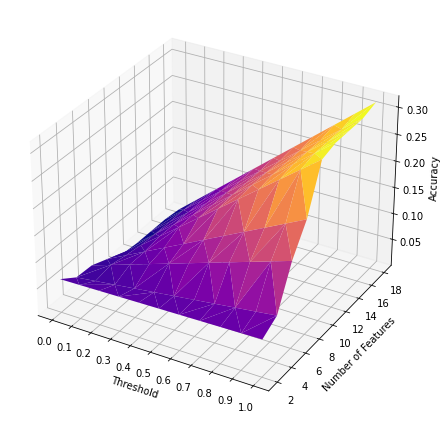

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
x = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y = [2, 4, 6, 8, 10, 12, 14, 16, 18]
X, Y = np.meshgrid(x, y)
data=np.array([
    [0.06281287330173357, 0.06347627683925774, 0.06413968037678193, 0.0648030839143061, 0.06546648745183029, 0.06612989098935446, 0.06679329452687863, 0.06745669806440281, 0.06812010160192698, 0.06878350513945117, 0.06944690867697534],
    [0.04096099798624394, 0.04558796700164617, 0.050214936017048406, 0.054841905032450636, 0.059468874047852865, 0.06409584306325511, 0.06872281207865734, 0.07334978109405957, 0.0779767501094618, 0.08260371912486403, 0.08723068814026627],
    [0.03922789251054571, 0.05153123283233211, 0.0638345731541185, 0.0761379134759049, 0.0884412537976913, 0.1007445941194777, 0.1130479344412641, 0.12535127476305047, 0.1376546150848369, 0.14995795540662327, 0.16226129572840967],
    [0.026723852621797592, 0.045404113410504154, 0.0640843741992107, 0.08276463498791725, 0.10144489577662383, 0.12012515656533038, 0.13880541735403693, 0.1574856781427435, 0.17616593893145005, 0.1948461997201566, 0.21352646050886315],
    [0.012034287034287034, 0.04060683942629068, 0.06917939181829433, 0.09775194421029798, 0.12632449660230163, 0.15489704899430526, 0.1834696013863089, 0.21204215377831254, 0.24061470617031622, 0.2691872585623199, 0.2977598109543235],
        [0.00914901017851233, 0.03882950337868512, 0.06850999657885791, 0.09819048977903068, 0.1278709829792035, 0.15755147617937626, 0.18723196937954903, 0.21691246257972183, 0.24659295577989462, 0.2762734489800674, 0.3059539421802402],
    [0.00914901017851233, 0.03882950337868512, 0.06850999657885791, 0.09819048977903068, 0.1278709829792035, 0.15755147617937626, 0.18723196937954903, 0.21691246257972183, 0.24659295577989462, 0.2762734489800674, 0.3059539421802402],
[0.00914901017851233, 0.03882950337868512, 0.06850999657885791, 0.09819048977903068, 0.1278709829792035, 0.15755147617937626, 0.18723196937954903, 0.21691246257972183, 0.24659295577989462, 0.2762734489800674, 0.3059539421802402],
[0.005445898647152924, 0.036345810384644864, 0.0672457221221368, 0.09814563385962873, 0.12904554559712067, 0.1599454573346126, 0.19084536907210453, 0.22174528080959646, 0.25264519254708845, 0.2835451042845804, 0.3144450160220723]
])

fig = plt.figure(figsize=(6,6))  # Set the size of the figure in inches
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X.flatten(), Y.flatten(), data.flatten(), cmap='plasma')

# Set the axis labels
ax.set_xlabel('Threshold')
ax.set_ylabel('Number of Features')
ax.set_zlabel('Accuracy')

# Customize the tick labels
x_ticks = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y_ticks = [2, 4, 6, 8, 10, 12, 14, 16, 18]
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

# Save the plot in IEEE format
plt.tight_layout()
plt.savefig('test2.png', bbox_inches='tight',dpi=300)

# Show the plot in the console
plt.show()